<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('DATA/breast-cancer-wisconsin-data.csv')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data = data.drop(['Unnamed: 32'], axis=1)

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
sns.pairplot(df)
plt.show()

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [7]:
# ANSWER
x = data.drop('diagnosis',axis=1)
y = data['diagnosis']

### 4. What is the baseline accuracy?

In [8]:
# ANSWER
#Not sure what is meant by baseline accuracy

### 5. Choose features to be your predictor variables and set up your X.

In [9]:
# ANSWER
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ordered_rank_features = SelectKBest(score_func=chi2,k=7)
ordered_feature = ordered_rank_features.fit(x,y)
dfscores = pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns = pd.DataFrame(x.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,id,4.622948e+08
1,radius_mean,2.661049e+02
2,texture_mean,9.389751e+01
3,perimeter_mean,2.011103e+03
4,area_mean,5.399166e+04
5,smoothness_mean,1.498993e-01
6,compactness_mean,5.403075e+00
7,concavity_mean,1.971235e+01
8,concave points_mean,1.054404e+01
9,symmetry_mean,2.573798e-01


In [10]:
features_rank.nlargest(10,'Score')

,Features,Score
0,id,4.622948e+08
24,area_worst,1.125984e+05
4,area_mean,5.399166e+04
14,area_se,8.758505e+03
23,perimeter_worst,3.665035e+03
3,perimeter_mean,2.011103e+03
21,radius_worst,4.916892e+02
1,radius_mean,2.661049e+02
13,perimeter_se,2.505719e+02
22,texture_worst,1.744494e+02


In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [12]:
print(model.feature_importances_)

[0.00423107 0.07591902 0.02091154 0.05280055 0.03796583 0.01045202
 0.01470019 0.06702403 0.06633028 0.00776381 0.00805008 0.02596805
 0.00527368 0.02306269 0.03941929 0.00513108 0.00870213 0.00646301
 0.00787544 0.00644272 0.00645158 0.09463316 0.02640355 0.0935629
 0.05694331 0.02181045 0.03060428 0.03630814 0.1077346  0.0180575
 0.01300402]


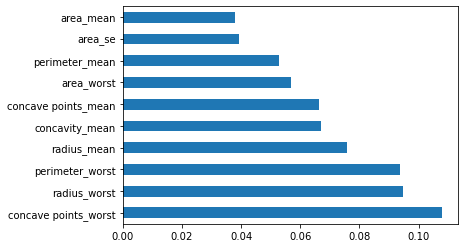

In [13]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [14]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

perimeter_worst            0.476363
area_worst                 0.464290
radius_worst               0.458439
concave points_mean        0.441192
concave points_worst       0.435975
perimeter_mean             0.403482
concavity_mean             0.372747
radius_mean                0.368635
area_mean                  0.361250
area_se                    0.342177
concavity_worst            0.314274
perimeter_se               0.274660
radius_se                  0.248253
compactness_worst          0.225386
compactness_mean           0.213718
concave points_se          0.125511
texture_worst              0.121934
concavity_se               0.116238
id                         0.106522
smoothness_worst           0.096617
texture_mean               0.094870
symmetry_worst             0.092907
smoothness_mean            0.080160
compactness_se             0.073948
fractal_dimension_worst    0.066806
symmetry_mean              0.064811
fractal_dimension_se       0.041184
smoothness_se              0

In [15]:
data = data.drop(['texture_se', 'fractal_dimension_mean', 'smoothness_worst', 'texture_mean', 'symmetry_worst', 'smoothness_mean', 'compactness_se', 'symmetry_mean', 'fractal_dimension_worst', 'fractal_dimension_se', 'smoothness_se', 'symmetry_se'],axis=1) 

In [16]:
data.head(10)

,id,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,842302,M,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,0.05373,0.01587,25.38,17.33,184.60,2019.0,0.6656,0.7119,0.2654
1,842517,M,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,0.01860,0.01340,24.99,23.41,158.80,1956.0,0.1866,0.2416,0.1860
2,84300903,M,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,0.03832,0.02058,23.57,25.53,152.50,1709.0,0.4245,0.4504,0.2430
3,84348301,M,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,0.05661,0.01867,14.91,26.50,98.87,567.7,0.8663,0.6869,0.2575
4,84358402,M,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,0.05688,0.01885,22.54,16.67,152.20,1575.0,0.2050,0.4000,0.1625
5,843786,M,12.45,82.57,477.1,0.17000,0.15780,0.08089,0.3345,2.217,27.19,0.03672,0.01137,15.47,23.75,103.40,741.6,0.5249,0.5355,0.1741
6,844359,M,18.25,119.60,1040.0,0.10900,0.11270,0.07400,0.4467,3.180,53.91,0.02254,0.01039,22.88,27.66,153.20,1606.0,0.2576,0.3784,0.1932
7,84458202,M,13.71,90.20,577.9,0.16450,0.09366,0.05985,0.5835,3.856,50.96,0.02488,0.01448,17.06,28.14,110.60,897.0,0.3682,0.2678,0.1556
8,844981,M,13.00,87.50,519.8,0.19320,0.18590,0.09353,0.3063,2.406,24.32,0.03553,0.01226,15.49,30.73,106.20,739.3,0.5401,0.5390,0.2060
9,84501001,M,12.46,83.97,475.9,0.23960,0.22730,0.08543,0.2976,2.039,23.94,0.07743,0.01432,15.09,40.68,97.65,711.4,1.0580,1.1050,0.2210


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [27]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))
# fit on the unstandardized data:

1.0


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [28]:
# ANSWER
#Not sure what is meant by baseline accuracy

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [29]:
# ANSWER
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [30]:
# ANSWER
rows = len(data.index)
knn = KNeighborsClassifier(n_neighbors=rows)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.6274165202108963


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

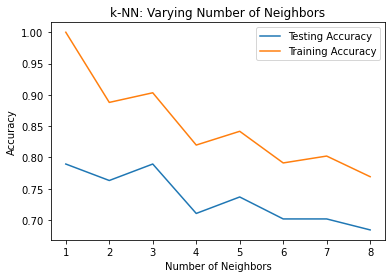

In [31]:
# ANSWER
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [32]:
# ANSWER
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.627 (0.044)


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [33]:
# ANSWER
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))
# Standarize X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

0.8611599297012302


In [34]:
# ANSWER
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.956140350877193


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



